<a href="https://colab.research.google.com/github/marianamartins228/ProjetoBootcampRestart2025/blob/main/Projeto_Bootcamp_Restart_Data_Girls_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

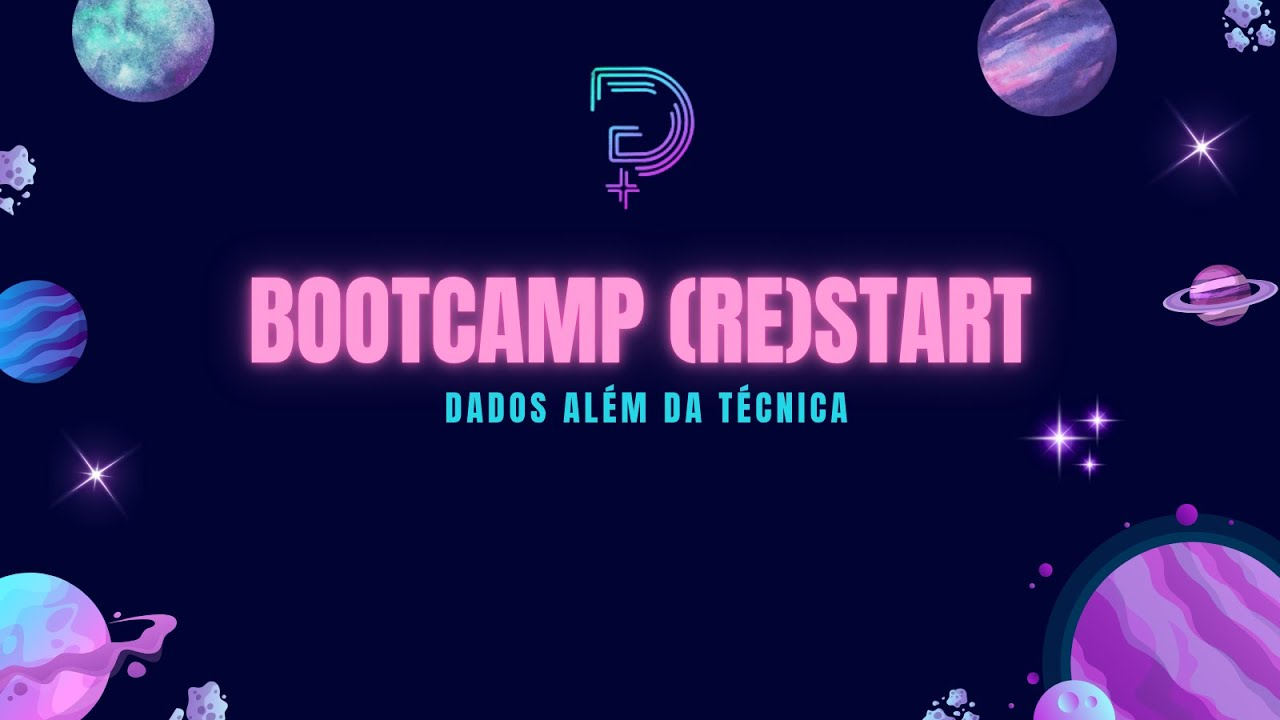

---

# Leitura & Exploração Inicial + Limpeza & Preparação dos Dados

Neste projeto, conduziremos uma análise aprofundada do conjunto de dados “IBM HR Analytics Attrition & Performance”, com o objetivo de compreender os principais fatores que influenciam a rotatividade de colaboradores. A proposta é identificar padrões e variáveis relevantes que possam subsidiar decisões estratégicas na área de Recursos Humanos da empresa fictícia Data Girls S.A.
Ao final do processo analítico, será desenvolvido um dashboard interativo que apresentará os principais insights.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importação das bibliotecas que poderão ser utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import duckdb

In [3]:
# leitura do dataset e impressão das primeiras linhas
df = pd.read_csv('/content/drive/MyDrive//RH-DATASET.csv')
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# lista de colunas
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Inicialmente, observa-se que o conjunto de dados abrange informações de funcionários e ex-funcionários, disponibilizando variáveis relevantes para a análise, como: idade, frequência de viagens a trabalho, distância até a empresa, faixa salarial, nível de satisfação com o emprego, realização de horas extras, qualidade do relacionamento com colegas de trabalho e tempo desde a última promoção, entre outros.
A leitura preliminar das primeiras linhas da base já indica que algumas variáveis categóricas foram previamente convertidas em valores numéricos — especialmente aquelas associadas a escalas hierárquicas — visando facilitar o tratamento computacional e a futura modelagem.

A verificação realizada indicou a ausência de valores nulos no conjunto de dados, o que dispensa a necessidade de aplicar técnicas de tratamento para esse tipo de ocorrência.

In [5]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Como medida preventiva, foi realizada a verificação de possíveis duplicidades nos códigos de identificação dos colaboradores. O resultado confirmou que não há registros repetidos, garantindo a integridade dessa variável no conjunto de dados.

In [6]:
df['EmployeeNumber'].duplicated().sum()

np.int64(0)

Como próximo passo, será realizada uma tradução dos nomes das colunas, com o intuito de tornar a análise mais clara e acessível.

In [7]:
df.rename(columns={
    'Age': 'idade',
    'Attrition': 'deixou_a_empresa',
    'BusinessTravel': 'viagem_trabalho',
    'DailyRate': 'salario_diario',
    'Department': 'departamento',
    'DistanceFromHome': 'distancia_casa',
    'Education': 'nivel_educacional',
    'EducationField': 'area_formacao',
    'EmployeeCount': 'contagem_funcionario',
    'EmployeeNumber': 'numero_funcionario',
    'EnvironmentSatisfaction': 'satisfacao_ambiente',
    'Gender': 'genero',
    'HourlyRate': 'salario_hora',
    'JobInvolvement': 'envolvimento_trabalho',
    'JobLevel': 'nivel_cargo',
    'JobRole': 'cargo',
    'JobSatisfaction': 'satisfacao_trabalho',
    'MaritalStatus': 'estado_civil',
    'MonthlyIncome': 'salario_mensal',
    'MonthlyRate': 'taxa_mensal',
    'NumCompaniesWorked': 'num_empresas_anteriores',
    'Over18': 'maior_18_anos',
    'OverTime': 'faz_hora_extra',
    'PercentSalaryHike': 'aumento_salarial_pct',
    'PerformanceRating': 'avaliacao_desempenho',
    'RelationshipSatisfaction': 'satisfacao_relacionamentos',
    'StandardHours': 'horas_padrao',
    'StockOptionLevel': 'nivel_acoes',
    'TotalWorkingYears': 'anos_experiencia_total',
    'TrainingTimesLastYear': 'treinamentos_ultimo_ano',
    'WorkLifeBalance': 'equilibrio_vida_trabalho',
    'YearsAtCompany': 'anos_empresa',
    'YearsInCurrentRole': 'anos_cargo_atual',
    'YearsSinceLastPromotion': 'anos_desde_ultima_promocao',
    'YearsWithCurrManager': 'anos_com_gerente_atual'
}, inplace=True)
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
df.head()

,idade,deixou_a_empresa,viagem_trabalho,salario_diario,departamento,distancia_casa,nivel_educacional,area_formacao,contagem_funcionario,numero_funcionario,satisfacao_ambiente,genero,salario_hora,envolvimento_trabalho,nivel_cargo,cargo,satisfacao_trabalho,estado_civil,salario_mensal,taxa_mensal,num_empresas_anteriores,maior_18_anos,faz_hora_extra,aumento_salarial_pct,avaliacao_desempenho,satisfacao_relacionamentos,horas_padrao,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,equilibrio_vida_trabalho,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Para identificar quais variáveis são categóricas e quais são numéricas no conjunto de dados, aplicou-se o método select_dtypes() para filtrar os tipos de dados desejados. Em seguida, foram selecionados apenas os nomes das colunas utilizando .columns, e esses nomes foram convertidos para listas com .tolist(). Isso facilita a organização das variáveis e a execução de análises específicas de acordo com seu tipo.

In [8]:
# variáveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns.tolist()
# variáveis numéricas
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(variaveis_categoricas)
print(variaveis_numericas)

['deixou_a_empresa', 'viagem_trabalho', 'departamento', 'area_formacao', 'genero', 'cargo', 'estado_civil', 'maior_18_anos', 'faz_hora_extra']
['idade', 'salario_diario', 'distancia_casa', 'nivel_educacional', 'contagem_funcionario', 'numero_funcionario', 'satisfacao_ambiente', 'salario_hora', 'envolvimento_trabalho', 'nivel_cargo', 'satisfacao_trabalho', 'salario_mensal', 'taxa_mensal', 'num_empresas_anteriores', 'aumento_salarial_pct', 'avaliacao_desempenho', 'satisfacao_relacionamentos', 'horas_padrao', 'nivel_acoes', 'anos_experiencia_total', 'treinamentos_ultimo_ano', 'equilibrio_vida_trabalho', 'anos_empresa', 'anos_cargo_atual', 'anos_desde_ultima_promocao', 'anos_com_gerente_atual']


## Variáveis categóricas

Como etapa preparatória para a tradução das variáveis categóricas, será utilizado um loop que percorre a lista previamente criada dessas variáveis. O objetivo é exibir todos os valores distintos presentes em cada coluna categórica, permitindo a identificação precisa de termos que precisam ser traduzidos ou ajustados.

In [9]:
for var in variaveis_categoricas:
    print(f"Valores únicos da variável '{var}':")
    print(df[var].unique())
    print('-' * 40)

Valores únicos da variável 'deixou_a_empresa':
['Yes' 'No']
----------------------------------------
Valores únicos da variável 'viagem_trabalho':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Valores únicos da variável 'departamento':
['Sales' 'Research & Development' 'Human Resources']
----------------------------------------
Valores únicos da variável 'area_formacao':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
----------------------------------------
Valores únicos da variável 'genero':
['Female' 'Male']
----------------------------------------
Valores únicos da variável 'cargo':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
----------------------------------------
Valores únicos da variável 'estado_civil':
['Single' 'Married' 'Divorced']
--------------

A variável 'maior_18_anos' apresenta apenas um único valor para todos os registros do conjunto de dados. Por não fornecer variação ou conteúdo informativo que possa contribuir com a análise, sua presença no dataset é redundante.

In [11]:
# neste caso já está excluindo a coluna direto no dataset. a utilização do 'axis=1' serve para indicar que é a exclusão de uma coluna
# e não uma linha
df = df.drop('maior_18_anos', axis=1)

Com a estrutura das variáveis categóricas devidamente mapeada, será realizada agora a substituição dos valores originais por suas respectivas traduções para o português, visto que essa análise será posteriormente utilizada pela área de negócio e assim garantimos que todos irão conseguir absorver os resultados da análise.
Para isso, será aplicado um processo de mapeamento de categorias, utilizando dicionários de tradução específicos para cada coluna, assegurando que a correspondência entre os valores originais e traduzidos seja precisa.

In [12]:
df['deixou_a_empresa'] = df['deixou_a_empresa'].replace({
    'Yes': 'Sim',
    'No': 'Não'
})

df['viagem_trabalho'] = df['viagem_trabalho'].replace({
    'Travel_Rarely': 'Viaja Raramente',
    'Travel_Frequently': 'Viaja Frequentemente',
    'Non-Travel': 'Não Viaja'
})

df['departamento'] = df['departamento'].replace({
    'Sales': 'Vendas',
    'Research & Development': 'Pesquisa e Desenvolvimento',
    'Human Resources': 'Recursos Humanos'
})

df['area_formacao'] = df['area_formacao'].replace({
    'Life Sciences': 'Ciências Biológicas',
    'Other': 'Outro',
    'Medical': 'Medicina',
    'Marketing': 'Marketing',
    'Technical Degree': 'Técnico',
    'Human Resources': 'Recursos Humanos'
})

df['genero'] = df['genero'].replace({
    'Female': 'Feminino',
    'Male': 'Masculino'
})

df['cargo'] = df['cargo'].replace({
    'Sales Executive': 'Executivo de Vendas',
    'Research Scientist': 'Cientista Pesquisador',
    'Laboratory Technician': 'Técnico de Laboratório',
    'Manufacturing Director': 'Diretor de Produção',
    'Healthcare Representative': 'Representante de Saúde',
    'Manager': 'Gerente',
    'Sales Representative': 'Representante de Vendas',
    'Research Director': 'Diretor de Pesquisa',
    'Human Resources': 'Recursos Humanos'
})

df['estado_civil'] = df['estado_civil'].replace({
    'Single': 'Solteiro(a)',
    'Married': 'Casado(a)',
    'Divorced': 'Divorciado(a)'
})

df['faz_hora_extra'] = df['faz_hora_extra'].replace({
    'Yes': 'Sim',
    'No': 'Não'
})

display(df[df.select_dtypes(include=['int64', 'float64']).columns.tolist()].head())

,idade,salario_diario,distancia_casa,nivel_educacional,contagem_funcionario,numero_funcionario,satisfacao_ambiente,salario_hora,envolvimento_trabalho,nivel_cargo,satisfacao_trabalho,salario_mensal,taxa_mensal,num_empresas_anteriores,aumento_salarial_pct,avaliacao_desempenho,satisfacao_relacionamentos,horas_padrao,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,equilibrio_vida_trabalho,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


## Variáveis numéricas

In [13]:
display(df[df.select_dtypes(include=['int64', 'float64']).columns.tolist()].head())


,idade,salario_diario,distancia_casa,nivel_educacional,contagem_funcionario,numero_funcionario,satisfacao_ambiente,salario_hora,envolvimento_trabalho,nivel_cargo,satisfacao_trabalho,salario_mensal,taxa_mensal,num_empresas_anteriores,aumento_salarial_pct,avaliacao_desempenho,satisfacao_relacionamentos,horas_padrao,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,equilibrio_vida_trabalho,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
valores_distintos = df.select_dtypes(include='number').nunique().sort_values()
print(valores_distintos)

avaliacao_desempenho             2
envolvimento_trabalho            4
satisfacao_trabalho              4
satisfacao_ambiente              4
satisfacao_relacionamentos       4
nivel_acoes                      4
equilibrio_vida_trabalho         4
nivel_cargo                      5
nivel_educacional                5
treinamentos_ultimo_ano          7
num_empresas_anteriores         10
aumento_salarial_pct            15
anos_desde_ultima_promocao      16
anos_com_gerente_atual          18
anos_cargo_atual                19
distancia_casa                  29
anos_empresa                    37
anos_experiencia_total          40
idade                           43
salario_hora                    71
salario_diario                 886
salario_mensal                1349
taxa_mensal                   1427
numero_funcionario            1470
dtype: int64


Como etapa inicial de limpeza dos dados, foram identificadas duas variáveis numéricas redundantes, que não apresentam diversidade de valores e, por isso, não oferecem utilidade analítica. Essa constatação foi feita ao contar a quantidade de entradas únicas em cada coluna numérica — variáveis que possuem apenas um valor distinto em todo o conjunto de dados não contribuem para os modelos ou interpretações e, portanto, foram excluídas do dataset.

In [14]:
df = df.drop(['contagem_funcionario', 'horas_padrao'], axis=1)


Durante a análise inicial, foi possível identificar que algumas variáveis numéricas, na verdade, representam categorias hierarquizadas que foram convertidas para valores numéricos com o intuito de facilitar o processamento dos dados. A identificação foi feita com base na documentação oficial do dataset disponível no Kaggle.

Com isso, a seguinte correspondência foi estabelecida:

nivel_educacional
1 'abaixo_faculdade'
2 'faculdade'
3 'bacharelado'
4 'mestrado'
5 'doutorado'

satisfacao_ambiente
1 'baixa'
2 'media'
3 'alta'
4 'muito_alta'

envolvimento_trabalho
1 'baixo'
2 'medio'
3 'alto'
4 'muito_alto'

satisfacao_trabalho
1 'baixa'
2 'media'
3 'alta'
4 'muito_alta'

avaliacao_desempenho
1 'baixa'
2 'boa'
3 'excelente'
4 'excepcional'

satisfacao_relacionamentos
1 'baixa'
2 'media'
3 'alta'
4 'muito_alta'

equilibrio_vida_trabalho
1 'ruim'
2 'bom'
3 'melhor'
4 'excelente'

Como próximo passo, serão criadas novas colunas com os valores traduzidos e descritivos dessas variáveis categóricas, a fim de facilitar a visualização dos dados em gráficos e dashboards no Power BI. Essa etapa contribuirá para uma interpretação mais intuitiva para o usuário final.

In [16]:
# Criação de dicionários de tradução
dicionarios = {
    'nivel_educacional': {
        1: 'abaixo_faculdade',
        2: 'faculdade',
        3: 'bacharelado',
        4: 'mestrado',
        5: 'doutorado'
    },
    'satisfacao_ambiente': {
        1: 'baixa',
        2: 'media',
        3: 'alta',
        4: 'muito_alta'
    },
    'envolvimento_trabalho': {
        1: 'baixo',
        2: 'medio',
        3: 'alto',
        4: 'muito_alto'
    },
    'satisfacao_trabalho': {
        1: 'baixa',
        2: 'media',
        3: 'alta',
        4: 'muito_alta'
    },
    'avaliacao_desempenho': {
        1: 'baixa',
        2: 'boa',
        3: 'excelente',
        4: 'excepcional'
    },
    'satisfacao_relacionamentos': {
        1: 'baixa',
        2: 'media',
        3: 'alta',
        4: 'muito_alta'
    },
    'equilibrio_vida_trabalho': {
        1: 'ruim',
        2: 'bom',
        3: 'melhor',
        4: 'excelente'
    }
}

# Para cada coluna, criar uma nova com os rótulos ao lado da original
for col, mapa in dicionarios.items():
    nova_col = col + '_nome'
    posicao = df.columns.get_loc(col) + 1  # posição ao lado da original
    df.insert(posicao, nova_col, df[col].map(mapa))



In [17]:
# Lista das colunas originais
colunas_originais = [
    'nivel_educacional',
    'satisfacao_ambiente',
    'envolvimento_trabalho',
    'satisfacao_trabalho',
    'avaliacao_desempenho',
    'satisfacao_relacionamentos',
    'equilibrio_vida_trabalho'
]

# Cria lista das colunas novas com os nomes
colunas_nomes = [col + '_nome' for col in colunas_originais]

# Junta as duas listas alternadamente, em que 'col' se refere às colunas originais e 'nome' às colunas com rótulos
colunas_para_mostrar = []
for col, nome in zip(colunas_originais, colunas_nomes):
    colunas_para_mostrar.extend([col, nome])

# Exibir apenas essas colunas
df[colunas_para_mostrar].head()

,nivel_educacional,nivel_educacional_nome,satisfacao_ambiente,satisfacao_ambiente_nome,envolvimento_trabalho,envolvimento_trabalho_nome,satisfacao_trabalho,satisfacao_trabalho_nome,avaliacao_desempenho,avaliacao_desempenho_nome,satisfacao_relacionamentos,satisfacao_relacionamentos_nome,equilibrio_vida_trabalho,equilibrio_vida_trabalho_nome
0,2,faculdade,2,media,3,alto,4,muito_alta,3,excelente,1,baixa,1,ruim
1,1,abaixo_faculdade,3,alta,2,medio,2,media,4,excepcional,4,muito_alta,3,melhor
2,2,faculdade,4,muito_alta,2,medio,3,alta,3,excelente,2,media,3,melhor
3,4,mestrado,4,muito_alta,3,alto,3,alta,3,excelente,3,alta,3,melhor
4,1,abaixo_faculdade,1,baixa,3,alto,2,media,3,excelente,4,muito_alta,3,melhor


Algumas variáveis do dataset exigem atenção especial quanto à sua interpretação e uso:

distancia_casa: A documentação oficial disponível no Kaggle não especifica a unidade de medida utilizada nessa coluna. No entanto, com base nas discussões da comunidade, a hipótese mais plausível é que a distância esteja expressa em milhas. Essa suposição será considerada nas análises subsequentes, mas em um case real seria interessante verificar essa informação com a área de negócio.

salario_mensal vs. taxa_mensal: Segundo esclarecimentos dos fóruns, o salario_mensal representa o valor líquido recebido pelo colaborador, enquanto a taxa_mensal corresponde ao custo total que esse funcionário representa para a empresa — incluindo benefícios, encargos e outras despesas operacionais.

aumento_salarial_pct: Por se tratar de um valor percentual, essa variável deve ser devidamente tratada e formatada ao ser representada graficamente, garantindo uma leitura coerente nos dashboards e visualizações.

nivel_acoes: Indica a quantidade de ações da empresa que pertencem ao funcionário. Por ser uma métrica numérica direta, pode revelar níveis de engajamento ou participação estratégica no negócio.




Após a substituição dos valores em variáveis categóricas e a criação de novas colunas descritivas, será realizado novamente o processo de leitura inicial do dataset. O objetivo é verificar se as alterações introduziram algum ruído ou inconsistência na estrutura dos dados, garantindo que o conjunto esteja íntegro e adequado para as próximas etapas da análise exploratória e visual.

In [18]:
df.isnull().sum()

,0
idade,0
deixou_a_empresa,0
viagem_trabalho,0
salario_diario,0
departamento,0
distancia_casa,0
nivel_educacional,0
nivel_educacional_nome,0
area_formacao,0
numero_funcionario,0


In [19]:
df['numero_funcionario'].duplicated().sum()

np.int64(0)

## Verificação outliers

Como primeiro passo para a identificação de possíveis outliers, será utilizado o método .describe(), que fornece estatísticas descritivas básicas como média, desvio padrão, valores mínimos e máximos, entre outros. No entanto, essa análise será aplicada exclusivamente às colunas cuja natureza permite a ocorrência de valores atípicos — como variáveis numéricas contínuas ou métricas relacionadas a remuneração, idade e tempo de empresa. Essa abordagem evita ruídos na interpretação e garante maior assertividade na detecção de anomalias.

In [20]:
df[[
    'idade',
    'salario_diario',
    'distancia_casa',
    'salario_hora',
    'salario_mensal',
    'taxa_mensal',
    'num_empresas_anteriores',
    'aumento_salarial_pct',
    'nivel_acoes',
    'anos_experiencia_total',
    'treinamentos_ultimo_ano',
    'anos_empresa',
    'anos_cargo_atual',
    'anos_desde_ultima_promocao',
    'anos_com_gerente_atual'
]].describe()

,idade,salario_diario,distancia_casa,salario_hora,salario_mensal,taxa_mensal,num_empresas_anteriores,aumento_salarial_pct,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Com base na análise estatística obtida por meio do método .describe(), foi possível identificar variáveis com possíveis outliers, seja pela grande distância entre o valor máximo e a mediana, seja por indícios de assimetria nas distribuições. As colunas que apresentaram essa característica são:

*   salario_diario

*   taxa_mensal

*   anos_empresa

*   anos_experiencia_total

*   anos_desde_ultima_promocao

*   num_empresas_anteriores

Essa observação inicial servirá de base para análises mais robustas, como a construção de boxplots que permitirão avaliar com maior precisão o impacto desses valores extremos e decidir sobre possíveis tratamentos.


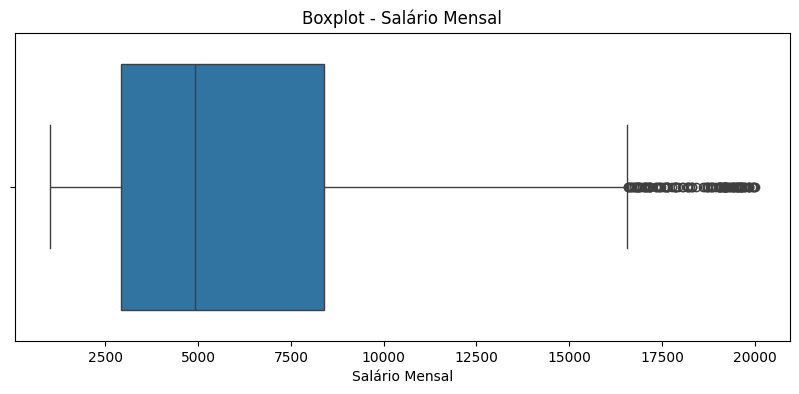

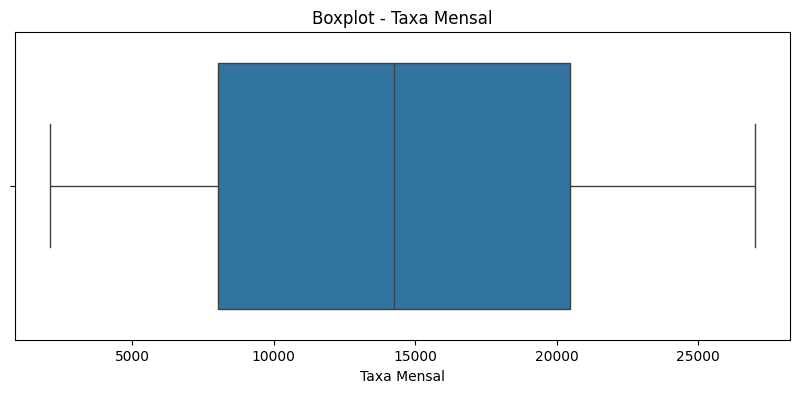

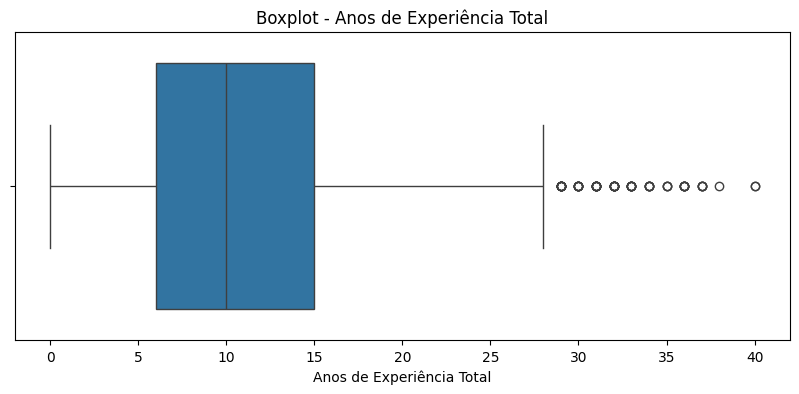

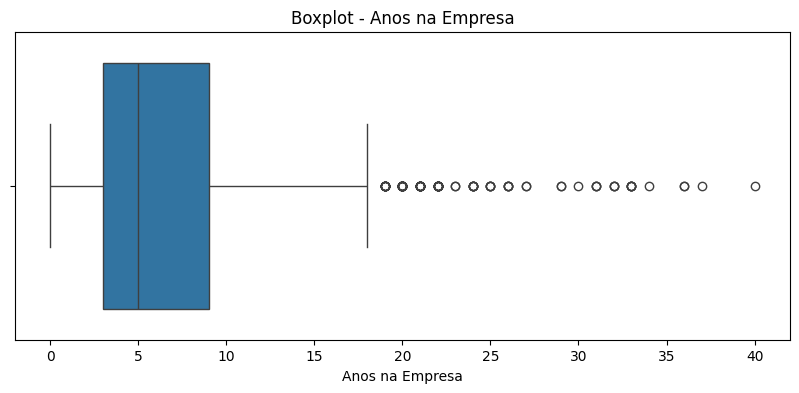

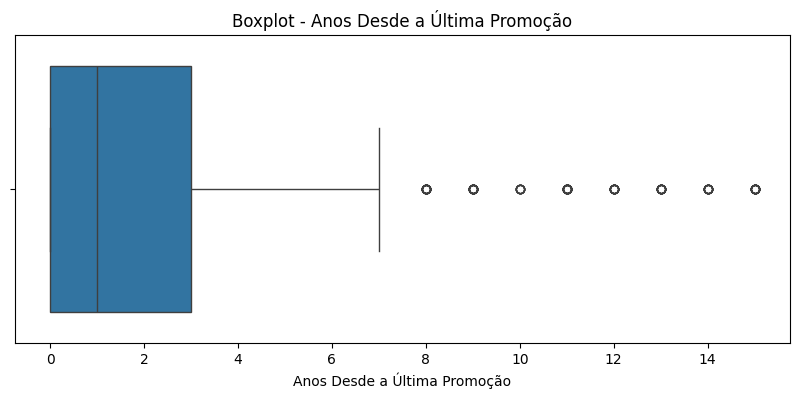

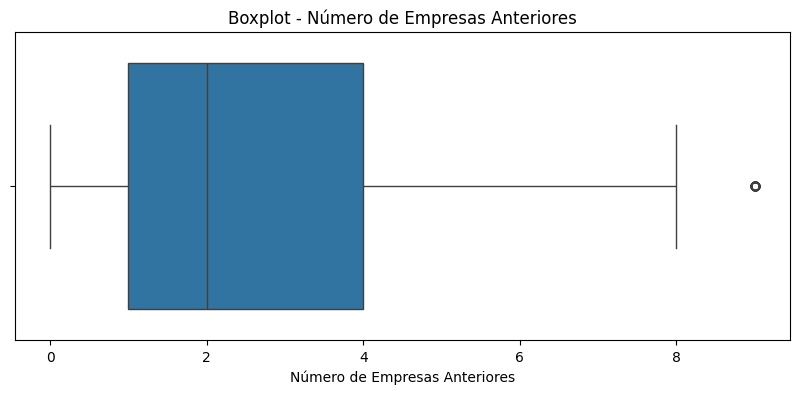

In [21]:
# Boxplot - Salário Mensal
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['salario_mensal'])
plt.title('Boxplot - Salário Mensal')
plt.xlabel('Salário Mensal')
plt.show()

# Boxplot - Taxa Mensal
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['taxa_mensal'])
plt.title('Boxplot - Taxa Mensal')
plt.xlabel('Taxa Mensal')
plt.show()

# Boxplot - Anos de Experiência Total
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['anos_experiencia_total'])
plt.title('Boxplot - Anos de Experiência Total')
plt.xlabel('Anos de Experiência Total')
plt.show()

# Boxplot - Anos na Empresa
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['anos_empresa'])
plt.title('Boxplot - Anos na Empresa')
plt.xlabel('Anos na Empresa')
plt.show()

# Boxplot - Anos desde a Última Promoção
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['anos_desde_ultima_promocao'])
plt.title('Boxplot - Anos Desde a Última Promoção')
plt.xlabel('Anos Desde a Última Promoção')
plt.show()

# Boxplot - Número de Empresas Anteriores
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['num_empresas_anteriores'])
plt.title('Boxplot - Número de Empresas Anteriores')
plt.xlabel('Número de Empresas Anteriores')
plt.show()

* Salário Mensal: apresenta alguns salários muito altos, sugerindo a presença de cargos de liderança ou executivos na empresa (analisando as variáveis categóricas, isso se confirma).

* Taxa Mensal: o gráfico revela uma distribuição relativamente equilibrada, indicando que a maioria dos funcionários possui custos mensais semelhantes.

* Anos de Experiência Total: mostra que a maioria está no meio da carreira, embora existam profissionais com ampla experiência.

* Anos na Empresa: indica que muitos funcionários têm pouco tempo de casa, mas há também casos de longa permanência, o que é plausível.

* Anos Desde a Última Promoção: aponta que a maior parte dos funcionários foi promovida recentemente, embora haja aqueles há muito tempo sem promoção.

* Número de Empresas Anteriores: revela perfis variados, com alguns funcionários que mudaram pouco de empresa e outros com histórico de maior rotatividade.



# Análise Exploratória (EDA)

Para a análise exploratória, utilizarei a integração do SQL com o Python, já que o SQL é uma linguagem declarativa e permite que as consultas expressem com mais clareza a lógica da análise.

In [22]:
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
df.head()

,idade,deixou_a_empresa,viagem_trabalho,salario_diario,departamento,distancia_casa,nivel_educacional,nivel_educacional_nome,area_formacao,numero_funcionario,satisfacao_ambiente,satisfacao_ambiente_nome,genero,salario_hora,envolvimento_trabalho,envolvimento_trabalho_nome,nivel_cargo,cargo,satisfacao_trabalho,satisfacao_trabalho_nome,estado_civil,salario_mensal,taxa_mensal,num_empresas_anteriores,faz_hora_extra,aumento_salarial_pct,avaliacao_desempenho,avaliacao_desempenho_nome,satisfacao_relacionamentos,satisfacao_relacionamentos_nome,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,equilibrio_vida_trabalho,equilibrio_vida_trabalho_nome,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
0,41,Sim,Viaja Raramente,1102,Vendas,1,2,faculdade,Ciências Biológicas,1,2,media,Feminino,94,3,alto,2,Executivo de Vendas,4,muito_alta,Solteiro(a),5993,19479,8,Sim,11,3,excelente,1,baixa,0,8,0,1,ruim,6,4,0,5
1,49,Não,Viaja Frequentemente,279,Pesquisa e Desenvolvimento,8,1,abaixo_faculdade,Ciências Biológicas,2,3,alta,Masculino,61,2,medio,2,Cientista Pesquisador,2,media,Casado(a),5130,24907,1,Não,23,4,excepcional,4,muito_alta,1,10,3,3,melhor,10,7,1,7
2,37,Sim,Viaja Raramente,1373,Pesquisa e Desenvolvimento,2,2,faculdade,Outro,4,4,muito_alta,Masculino,92,2,medio,1,Técnico de Laboratório,3,alta,Solteiro(a),2090,2396,6,Sim,15,3,excelente,2,media,0,7,3,3,melhor,0,0,0,0
3,33,Não,Viaja Frequentemente,1392,Pesquisa e Desenvolvimento,3,4,mestrado,Ciências Biológicas,5,4,muito_alta,Feminino,56,3,alto,1,Cientista Pesquisador,3,alta,Casado(a),2909,23159,1,Sim,11,3,excelente,3,alta,0,8,3,3,melhor,8,7,3,0
4,27,Não,Viaja Raramente,591,Pesquisa e Desenvolvimento,2,1,abaixo_faculdade,Medicina,7,1,baixa,Masculino,40,3,alto,1,Técnico de Laboratório,2,media,Casado(a),3468,16632,9,Não,12,3,excelente,4,muito_alta,1,6,3,3,melhor,2,2,2,2


In [ ]:
# Quantidade de funcionários que deixaram a empresa:
resultado0 = duckdb.query("""
    SELECT
      deixou_a_empresa,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    GROUP BY deixou_a_empresa
""").to_df()
print(resultado0)


  deixou_a_empresa  quantidade
0              Não        1233
1              Sim         237


/tmp/ipython-input-2906113349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deixou_a_empresa', data=df, palette='pastel')


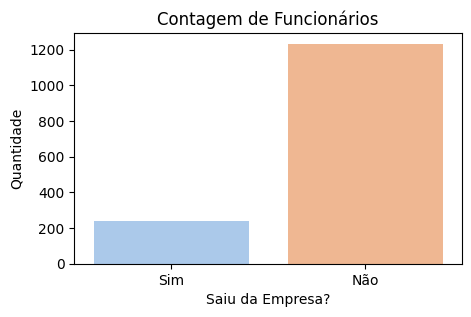

In [23]:
plt.figure(figsize=(5,3))
sns.countplot(x='deixou_a_empresa', data=df, palette='pastel')
plt.title('Contagem de Funcionários')
plt.xlabel('Saiu da Empresa?')
plt.ylabel('Quantidade')
plt.show()

Perfil dos colaboradores que deixaram a empresa:

In [24]:
# Gênero x Saíram
resultado1 = duckdb.query("""
    SELECT
      genero,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY genero, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado1)


      genero  quantidade
0  Masculino         150
1   Feminino          87


In [25]:
# Gênero x Não Saíram
resultado2 = duckdb.query("""
    SELECT
      genero,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Não'
    GROUP BY genero, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado2)

      genero  quantidade
0  Masculino         732
1   Feminino         501


/tmp/ipython-input-3103305632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado1, x='genero', y='quantidade', palette='pastel')


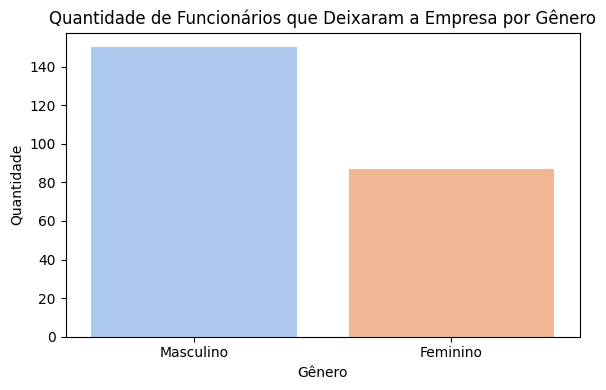

/tmp/ipython-input-3103305632.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado2, x='genero', y='quantidade', palette='pastel')


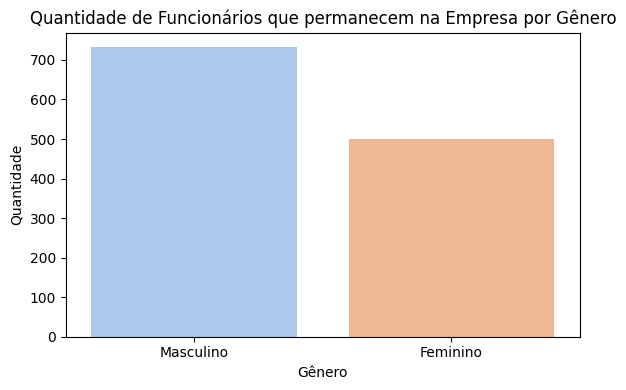

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(data=resultado1, x='genero', y='quantidade', palette='pastel')

plt.title('Quantidade de Funcionários que Deixaram a Empresa por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=resultado2, x='genero', y='quantidade', palette='pastel')

plt.title('Quantidade de Funcionários que permanecem na Empresa por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

In [27]:
# Estado civil x Saíram
resultado3 = duckdb.query("""
    SELECT
      estado_civil,
      COUNT(*) as quantidade,
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY estado_civil
    ORDER BY quantidade DESC
""").to_df()
print(resultado3)

    estado_civil  quantidade
0    Solteiro(a)         120
1      Casado(a)          84
2  Divorciado(a)          33


In [28]:
# Estado civil x Não Saíram
resultado4 = duckdb.query("""
    SELECT
      estado_civil,
      COUNT(*) as quantidade,
    FROM df
    WHERE deixou_a_empresa = 'Não'
    GROUP BY estado_civil
    ORDER BY quantidade DESC
""").to_df()
print(resultado4)

    estado_civil  quantidade
0      Casado(a)         589
1    Solteiro(a)         350
2  Divorciado(a)         294


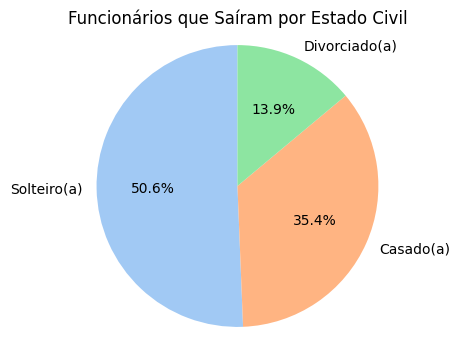

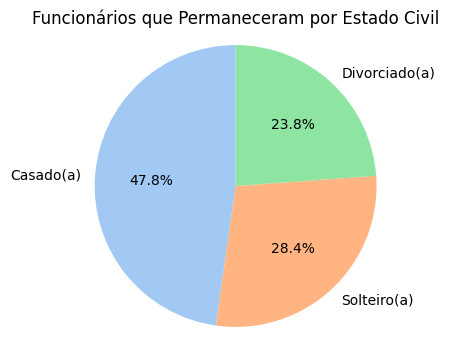

In [29]:
labels = resultado3['estado_civil']
sizes = resultado3['quantidade']
colors = sns.color_palette('pastel')[:len(sizes)]

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Funcionários que Saíram por Estado Civil')
plt.axis('equal')
plt.show()

labels = resultado4['estado_civil']
sizes = resultado4['quantidade']
colors = sns.color_palette('pastel')[:len(sizes)]

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Funcionários que Permaneceram por Estado Civil')
plt.axis('equal')
plt.show()

In [30]:
# Educação
resultado5 = duckdb.query("""
    SELECT
      nivel_educacional_nome,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY nivel_educacional_nome, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado5)

  nivel_educacional_nome  quantidade
0            bacharelado          99
1               mestrado          58
2              faculdade          44
3       abaixo_faculdade          31
4              doutorado           5


In [31]:
resultado6 = duckdb.query("""
    SELECT
      nivel_educacional_nome,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Não'
    GROUP BY nivel_educacional_nome, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado6)

  nivel_educacional_nome  quantidade
0            bacharelado         473
1               mestrado         340
2              faculdade         238
3       abaixo_faculdade         139
4              doutorado          43


/tmp/ipython-input-2229775422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado5, x='nivel_educacional_nome', y='quantidade', palette='pastel')


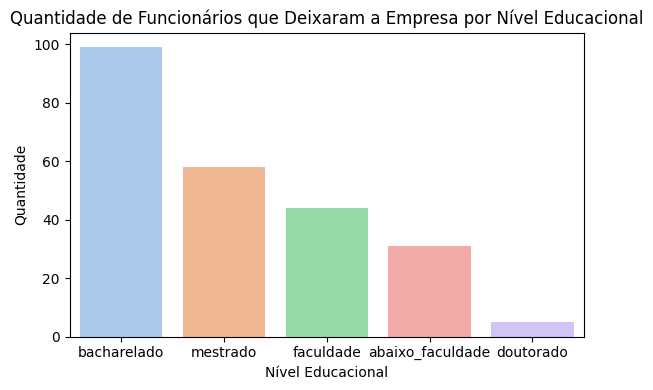

/tmp/ipython-input-2229775422.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado6, x='nivel_educacional_nome', y='quantidade', palette='deep')


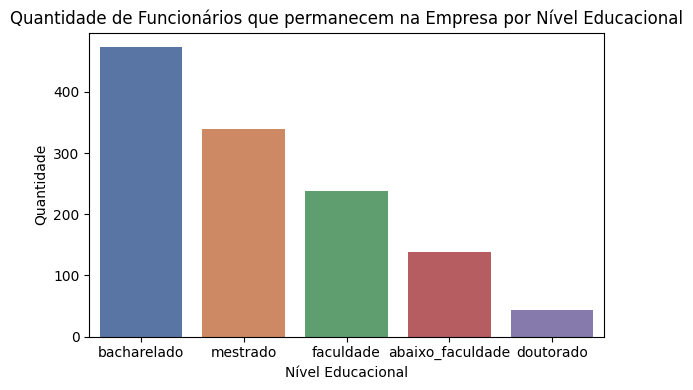

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(data=resultado5, x='nivel_educacional_nome', y='quantidade', palette='pastel')

plt.title('Quantidade de Funcionários que Deixaram a Empresa por Nível Educacional')
plt.xlabel('Nível Educacional')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=resultado6, x='nivel_educacional_nome', y='quantidade', palette='deep')

plt.title('Quantidade de Funcionários que permanecem na Empresa por Nível Educacional')
plt.xlabel('Nível Educacional')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

In [33]:
# Idade x Saíram
resultado7 = duckdb.query("""
    SELECT
  CASE
    WHEN idade < 25 THEN '18-25'
    WHEN idade BETWEEN 25 AND 34 THEN '25-34'
    WHEN idade BETWEEN 35 AND 44 THEN '35-44'
    WHEN idade BETWEEN 45 AND 54 THEN '45-54'
    ELSE '55+'
  END AS Faixa_Etaria,
  COUNT(*) AS Total_Que_Sairam
FROM df
WHERE deixou_a_empresa = 'Sim'
GROUP BY
  CASE
    WHEN idade < 25 THEN '18-25'
    WHEN idade BETWEEN 25 AND 34 THEN '25-34'
    WHEN idade BETWEEN 35 AND 44 THEN '35-44'
    WHEN idade BETWEEN 45 AND 54 THEN '45-54'
    ELSE '55+'
  END
ORDER BY Total_Que_Sairam DESC
""").to_df()
print(resultado7)

  Faixa_Etaria  Total_Que_Sairam
0        25-34               112
1        35-44                51
2        18-25                38
3        45-54                25
4          55+                11


In [34]:
# Idade
resultado8 = duckdb.query("""
    SELECT
  CASE
    WHEN idade < 25 THEN '18-25'
    WHEN idade BETWEEN 25 AND 34 THEN '25-34'
    WHEN idade BETWEEN 35 AND 44 THEN '35-44'
    WHEN idade BETWEEN 45 AND 54 THEN '45-54'
    ELSE '55+'
  END AS Faixa_Etaria,
  COUNT(*) AS Total_Que_Permanece
FROM df
WHERE deixou_a_empresa = 'Não'
GROUP BY
  CASE
    WHEN idade < 25 THEN '18-25'
    WHEN idade BETWEEN 25 AND 34 THEN '25-34'
    WHEN idade BETWEEN 35 AND 44 THEN '35-44'
    WHEN idade BETWEEN 45 AND 54 THEN '45-54'
    ELSE '55+'
  END
ORDER BY Total_Que_Permanece DESC
""").to_df()
print(resultado8)

  Faixa_Etaria  Total_Que_Permanece
0        35-44                  454
1        25-34                  442
2        45-54                  220
3        18-25                   59
4          55+                   58


/tmp/ipython-input-2103598680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado7, x='Faixa_Etaria', y='Total_Que_Sairam', palette='pastel')


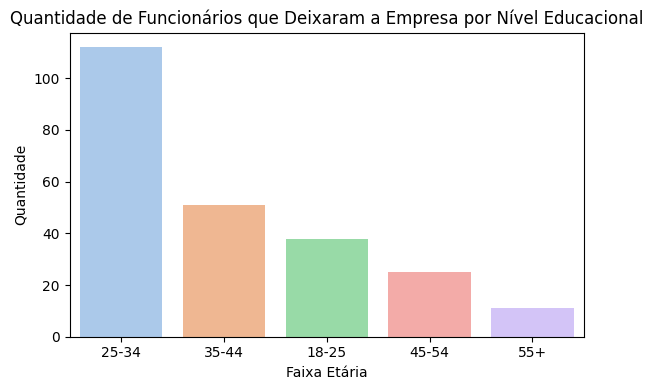

/tmp/ipython-input-2103598680.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado8, x='Faixa_Etaria', y='Total_Que_Permanece', palette='deep')


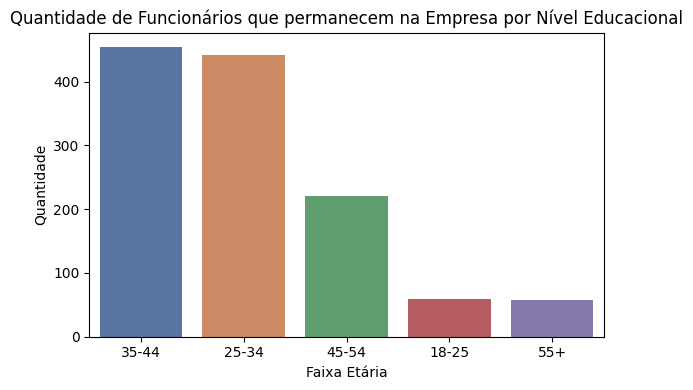

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(data=resultado7, x='Faixa_Etaria', y='Total_Que_Sairam', palette='pastel')

plt.title('Quantidade de Funcionários que Deixaram a Empresa por Nível Educacional')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=resultado8, x='Faixa_Etaria', y='Total_Que_Permanece', palette='deep')

plt.title('Quantidade de Funcionários que permanecem na Empresa por Nível Educacional')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

Perfil majoritário dos colaboradores e ex colaboradores na base de dados:
*   Quantidade de homens supera substancialmente a de mulheres.
*   Solteiro (a) para os que deixaram a empresa e Casado para os que permaneceram.
*   Com nível de bacharel e mestre, tanto os que deixaram a empresa quanto os que permanecem.
*   Faixa Etária dos colaboradores atuais entre 25 e 44 anos, e entre os que saíram da empresa os mais jovens de 18 a 34 anos são maioria.

In [36]:
# Rotatividade por departamento
resultado9 = duckdb.query("""
    SELECT
      departamento,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY departamento, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado9)

                 departamento  quantidade
0  Pesquisa e Desenvolvimento         133
1                      Vendas          92
2            Recursos Humanos          12


In [37]:
# Colaboradores por departamento
resultado10 = duckdb.query("""
    SELECT
      departamento,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Não'
    GROUP BY departamento, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado10)

                 departamento  quantidade
0  Pesquisa e Desenvolvimento         828
1                      Vendas         354
2            Recursos Humanos          51


A consulta revela, inicialmente, que o setor de Recursos Humanos apresenta baixa rotatividade em comparação com os setores de Pesquisa & Desenvolvimento e Vendas, porém esses setores também são os que detém o maior número geral de colaboradores. Para este caso será mais válido calcular a taxa de rotatividade.

In [38]:
# Cargos com maior rotatividade
resultado11 = duckdb.query("""
    SELECT
      cargo,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY cargo, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado11)

                     cargo  quantidade
0   Técnico de Laboratório          62
1      Executivo de Vendas          57
2    Cientista Pesquisador          47
3  Representante de Vendas          33
4         Recursos Humanos          12
5      Diretor de Produção          10
6   Representante de Saúde           9
7                  Gerente           5
8      Diretor de Pesquisa           2


In [39]:
# Cargos x Colaboradores
resultado11 = duckdb.query("""
    SELECT
      cargo,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Não'
    GROUP BY cargo, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado11)

                     cargo  quantidade
0      Executivo de Vendas         269
1    Cientista Pesquisador         245
2   Técnico de Laboratório         197
3      Diretor de Produção         135
4   Representante de Saúde         122
5                  Gerente          97
6      Diretor de Pesquisa          78
7  Representante de Vendas          50
8         Recursos Humanos          40


Dois dos cargos com maior rotatividade pertencem ao setor de Pesquisa & Desenvolvimento, enquanto um está no setor de Vendas. Esses mesmos cargos são os que mais possuem colaboradores atualmente, sendo necessário uma análise aprofundada.

In [40]:
# Os que saíram da empresa precisavam viajar a trabalho?
resultado13 = duckdb.query("""
    SELECT
      viagem_trabalho,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY viagem_trabalho, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado13)

        viagem_trabalho  quantidade
0       Viaja Raramente         156
1  Viaja Frequentemente          69
2             Não Viaja          12


O fato de o cargo exigir viagens aparentemente não está relacionado à rotatividade dos funcionários.

In [41]:
# Satisfação com o ambiente dos que deixaram a empresa
resultado15 = duckdb.query("""
    SELECT
      satisfacao_ambiente_nome,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY satisfacao_ambiente_nome, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado15)

  satisfacao_ambiente_nome  quantidade
0                    baixa          72
1                     alta          62
2               muito_alta          60
3                    media          43


A satisfação com o ambiente parece estar bem distribuída, sendo necessária uma análise visual mais aprofundada para identificar possíveis relações.

In [42]:
# Satisfação com o trabalho dos que deixaram a empresa
resultado17 = duckdb.query("""
    SELECT
      satisfacao_trabalho_nome,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY satisfacao_trabalho_nome, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado17)

  satisfacao_trabalho_nome  quantidade
0                     alta          73
1                    baixa          66
2               muito_alta          52
3                    media          46


O mesmo se observa com relação à satisfação com o trabalho, o que sugere que esses fatores talvez não foram determinantes para a saída dos funcionários da empresa. Ainda assim é preciso analisar a distribuição dessa variável comparando com o funcionários que não deixaram a empresa. Todas essas análises serão realizadas visualmente no Power BI.

In [43]:
# Quantos fazem hora extra
resultado19 = duckdb.query("""
    SELECT
      faz_hora_extra,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY faz_hora_extra, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado19)

  faz_hora_extra  quantidade
0            Sim         127
1            Não         110


Também uma distribuição homogênea em valores absolutos, sendo necessária análise mais aprofundada.

In [44]:
# Distribuição da avaliação de desempenho
resultado21 = duckdb.query("""
    SELECT
      avaliacao_desempenho_nome,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY avaliacao_desempenho_nome, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado21)

  avaliacao_desempenho_nome  quantidade
0                 excelente         200
1               excepcional          37


In [45]:
# Distribuição da avaliação de desempenho em toda a base
resultado23 = duckdb.query("""
    SELECT
      DISTINCT(avaliacao_desempenho_nome)
    FROM df
""").to_df()
print(resultado23)

  avaliacao_desempenho_nome
0                 excelente
1               excepcional


A princípio, considerei que poderia se tratar de um erro, já que todos os funcionários que deixaram a empresa estão classificados com avaliações de desempenho 'excelente' ou 'excepcional'. No entanto, ao observar que toda a base está avaliada dessa forma, concluo que esse indicador não oferece insights relevantes. Como analista de dados, eu provavelmente entraria em contato com a área de negócio responsável para validar essas informações.

In [46]:
# Equilíbrio entre vida e trabalho
resultado25 = duckdb.query("""
    SELECT
      equilibrio_vida_trabalho_nome,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY equilibrio_vida_trabalho_nome, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado25)


  equilibrio_vida_trabalho_nome  quantidade
0                        melhor         127
1                           bom          58
2                     excelente          27
3                          ruim          25


O fator "equilíbrio entre vida pessoal e profissional" também não demonstra relação evidente com a rotatividade. De modo geral, variáveis categóricas como satisfação com o ambiente de trabalho, com as tarefas desempenhadas e com o equilíbrio de vida parecem representar respostas a questionários de clima organizacional, comumente aplicados pelo RH. É possível supor que, por receio de que o anonimato não fosse totalmente garantido, alguns colaboradores tenham optado por não expressar suas opiniões de forma sincera. Essa hipótese pode justificar a falta de variação ou de correlação significativa com a saída de funcionários. Por outro lado, é igualmente plausível que a rotatividade, neste caso, não esteja de fato relacionada a essas métricas subjetivas.

In [47]:
# Anos desde a última promoção
resultado27 = duckdb.query("""
    SELECT
      anos_desde_ultima_promocao,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY anos_desde_ultima_promocao, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado27)

    anos_desde_ultima_promocao  quantidade
0                            0         110
1                            1          49
2                            2          27
3                            7          16
4                            3           9
5                            6           6
6                            4           5
7                            9           4
8                           15           3
9                           11           2
10                          13           2
11                           5           2
12                          10           1
13                          14           1


Essa consulta revelou uma informação relevante: dos 237 funcionários que deixaram a empresa, 159 haviam sido promovidos nos últimos dois anos. Isso sugere que, pode ser que nesses casos, a rotatividade não está diretamente relacionada à ausência de reconhecimento profissional. Entretanto, isso pode indicar que promoções foram tardias demais, ou que a promoção veio acompanhada de novas pressões.

## Resumo da Análise Exploratória

Ao investigar os dados sobre os colaboradores que deixaram a empresa, diversos padrões e hipóteses relevantes foram identificados:

* **Rotatividade por setor**: Recursos Humanos demonstra baixa rotatividade, enquanto Pesquisa & Desenvolvimento e Vendas concentram os cargos com maior instabilidade. Mas vale lembrar que essa rotatividade parece proporcional a quantidade de cargos existentes.

* **Perfil dos funcionários desligados**:
  - Maioria composta por **homens** e **solteiros(as)**
  - **Formação acadêmica**: predominância de bacharelado e mestrado
  - **Faixa etária**: entre 18 e 34 anos
  - Perfil sugere que profissionais jovens e qualificados estão deixando a empresa

* **Avaliação de desempenho**: Todos os desligados foram avaliados como “excelente” ou “excepcional”, mas esse padrão se repete em toda a base — o que invalida esse indicador como explicativo. Recomenda-se **validação com a área de negócios**.

* **Reconhecimento profissional**: 159 dos 237 ex-funcionários haviam sido promovidos nos últimos dois anos.

* **Viagens a trabalho**: A exigência de viagem **não demonstrou correlação aparente** com a rotatividade.

* **Satisfação**: Tanto com o **ambiente** quanto com o **trabalho**, os dados estão bem distribuídos. Será necessária uma **análise visual mais aprofundada** para detectar padrões ou correlações.

* **Características profissionais**:
  - Muitos possuem **pouco tempo de empresa**
  - A maioria está em estágio **intermediário de carreira**
  - Histórico de movimentação variado, com perfis de **alta e baixa rotatividade**

---

## Próximo Passo: Construção do Dashboard

Com base nesse diagnóstico, partimos agora para a **construção de um dashboard interativo**, onde os insights serão representados visualmente. O painel permitirá:

* Explorar **rotatividade por setor, cargo e perfil**
* Cruzar variáveis como **promoção, satisfação e tempo de empresa**
* Aplicar **filtros dinâmicos** para facilitar a leitura dos dados por diferentes dimensões
* Visualizar **tendências, padrões e anomalias** que não são evidentes nos dados tabulares

Por enquanto, obrigada por me acompanhar até aqui!



In [ ]:
df.to_csv('dataset_modificado.csv', index=False)